In [36]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
import qiskit.quantum_info as qi
import numpy as np
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere

from qiskit.extensions import RXGate, XGate, CXGate

Norm = 1/np.sqrt(2)

# create empty gate for 'fake input' --------------------------------

# input 0
in_zero = qi.Operator([[1,0],
                       [0,1]])
# input 1 (X on 0)
in_one = qi.Operator([[0,1],
                      [1,0]])

# input + (Hadamard on 0)
in_plus = qi.Operator([[Norm,Norm],
                       [Norm,-Norm]])


# input - (Hadamard on 1)
in_minus = qi.Operator([[Norm, Norm],
                         [-Norm, Norm]])

# empty box for drop down
empty_box = qi.Operator([[1,0],
                         [0,1]])  # use in_zero ?


# 2 qubit gate box for drop down
empty_box_control = qi.Operator([[1,0,0,0],
                         [0,1,0,0],
                         [0,0,1,0],
                         [0,0,0,1]])

#measurement box 
measure_z = qi.Operator([[1,0],
                         [0,1]]) 

measure_x = qi.Operator([[1,1],
                         [1,-1]]) 



#function read the drop_down, used to replace in the circuit the "empty" boxes with the chosen gates by the player
def drop_down_single(circuit, drop_number, q_index):
    ''' input: circuit (level)
        number of drop down menu
        index of qubit for adding the gate
    output: chosen gate appended to circuit'''
    if drop_number == 'I':
        circuit.id(q_index)
    elif drop_number == 'X':
        circuit.x(q_index)
    elif drop_number == 'Y':
        circuit.y(q_index)
    elif drop_number == 'Z':
        circuit.z(q_index)
    elif drop_number == 'H':
        circuit.h(q_index)

def drop_down_double(circuit, drop_number, qind_control, qind_target):
    ''' input: circuit (level)
        index of element in drop down menu
        index of qubit for adding the gate
        output: chosen gate appended to circuit'''
    if drop_number == 'CI':
        circuit.id(qind_target)
    elif drop_number == 'CX':
        circuit.cx(qind_control, qind_target)
    elif drop_number == 'CZ':
        circuit.cz(qind_control, qind_target)

def meas_in_basis(circuit, q_index, basis):
    '''input: circuit (level)
       index of qubit that will be measured
       basis that its measured in'''
    if basis == 'Mx':
        circuit.h(q_index)

In [64]:
#solution to sudoku
#drop_down_s=['Z', 'H', 'H', 'H', 'H', 'H', 'X', 'I', 'H', 'H', 'Z', 'X']
#drop_down_d=['CZ', 'CX', 'CX', 'CZ', 'CZ', 'CZ']
#drop_down_measure=['Mz', 'Mz', 'Mz', 'Mz', 'Mx', 'Mx',  'Mz', 'Mx', 'Mz', 'Mx']

#player choice
drop_down_s=['Z', 'H', 'H', 'H', 'H', 'H', 'X', 'I', 'H', 'H', 'Z', 'X']
drop_down_d=['CZ', 'CX', 'CX', 'CZ', 'CZ', 'CZ']
drop_down_measure=['Mz', 'Mz', 'Mz', 'Mz', 'Mx', 'Mx',  'Mz', 'Mx', 'Mz', 'Mx']
print(drop_down_measure)

drop_down_measure.insert(1,'Mx')
drop_down_measure.insert(2,'Mx')
drop_down_measure.insert(5,'Mx')
drop_down_measure.insert(11,'Mz')
drop_down_measure.insert(12,'Mx')
drop_down_measure.insert(14,'Mz')
print(drop_down_measure)

['Mz', 'Mz', 'Mz', 'Mz', 'Mx', 'Mx', 'Mz', 'Mx', 'Mz', 'Mx']
['Mz', 'Mx', 'Mx', 'Mz', 'Mz', 'Mx', 'Mz', 'Mx', 'Mx', 'Mz', 'Mx', 'Mz', 'Mx', 'Mz', 'Mz', 'Mx']


['Mz', 'Mx', 'Mx', 'Mz', 'Mz', 'Mx', 'Mz', 'Mx', 'Mx', 'Mz', 'Mx', 'Mz', 'Mx', 'Mz', 'Mz', 'Mx']


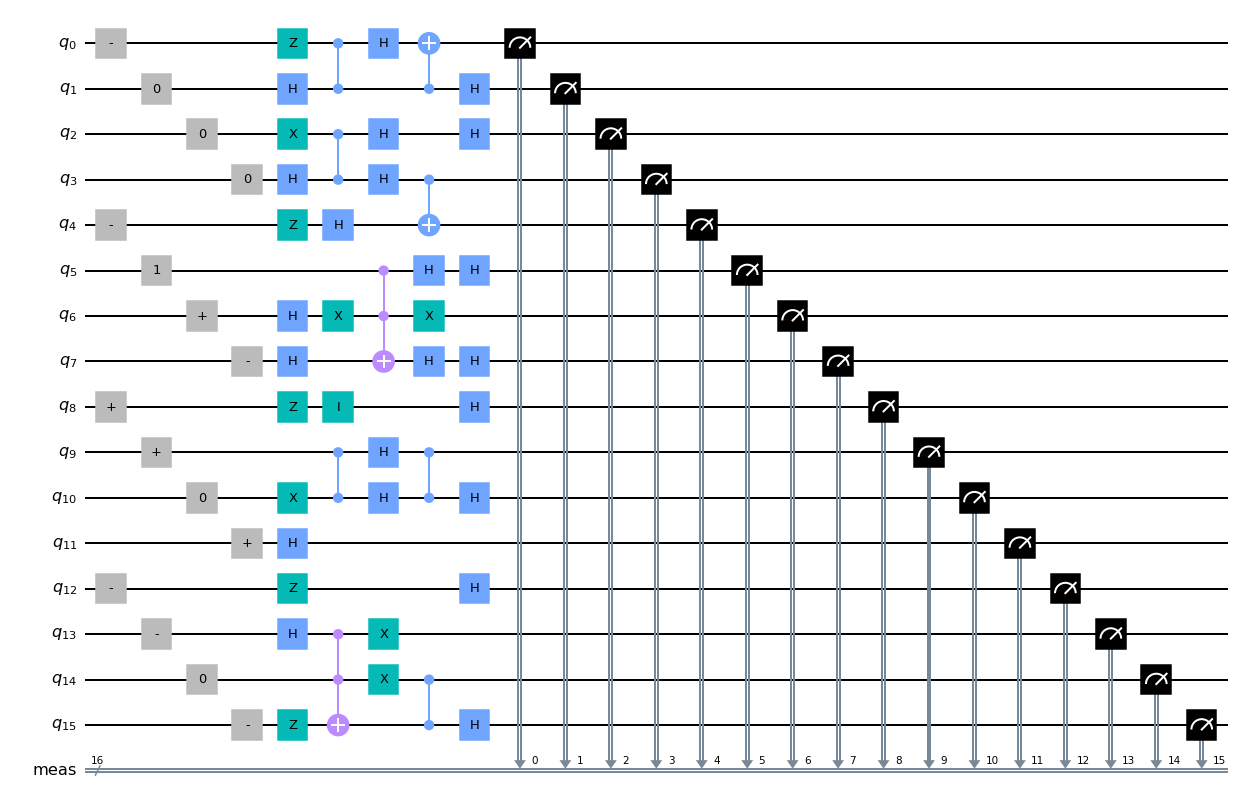

In [65]:
circ_02 = QuantumCircuit(16)

#sudoku 4x4: choice 0 --> ket(0), 1 -->ket(+), 2-->ket(-), 4-->ket(1)
#create input state/sudoku input

#qubit 0 and 1
circ_02.unitary(in_minus, 0, label="-")
circ_02.unitary(in_minus, 4, label="-")
circ_02.unitary(in_plus, 8, label="+")
circ_02.unitary(in_minus, 12, label="-")
circ_02.barrier()

circ_02.unitary(in_zero, 1, label="0")
circ_02.unitary(in_one, 5, label="1")
circ_02.unitary(in_plus, 9, label="+")
circ_02.unitary(in_minus, 13, label="-")
circ_02.barrier()

circ_02.unitary(in_zero, 2, label="0")
circ_02.unitary(in_plus, 6, label="+")
circ_02.unitary(in_zero, 10, label="0")
circ_02.unitary(in_zero, 14, label="0")
circ_02.barrier()

circ_02.unitary(in_zero, 3, label="0")
circ_02.unitary(in_minus, 7, label="-")
circ_02.unitary(in_plus, 11, label="+")
circ_02.unitary(in_minus, 15, label="-")
circ_02.barrier()

#qubit 0 and 1
drop_down_single(circ_02, drop_down_s[0], 0)
circ_02.h(1)
drop_down_double(circ_02, drop_down_d[0], 1, 0)
circ_02.h(0)
drop_down_double(circ_02, drop_down_d[1], 1, 0)

#qubit 2 and 3 and 4
circ_02.x(2)
drop_down_single(circ_02, drop_down_s[1], 3)
circ_02.cz(2,3)
circ_02.z(4)

circ_02.h(2)
drop_down_single(circ_02, drop_down_s[2], 3)
drop_down_single(circ_02, drop_down_s[3], 4)
drop_down_double(circ_02, drop_down_d[2], 3, 4)


# qubit 5 6 7
drop_down_single(circ_02, drop_down_s[4], 6)
circ_02.x(6)
drop_down_single(circ_02, drop_down_s[5], 7)
circ_02.toffoli(5,6,7)
circ_02.h(5)
drop_down_single(circ_02, drop_down_s[6], 6)
circ_02.h(7)

#qubit 8
circ_02.z(8)
drop_down_single(circ_02, drop_down_s[7], 8)

# qubits 9,10
circ_02.x(10)
drop_down_double(circ_02, drop_down_d[3], 9, 10)
circ_02.h(9)
drop_down_single(circ_02, drop_down_s[8], 10)
drop_down_double(circ_02, drop_down_d[4], 9, 10)

# qubits 11
circ_02.h(11)

# qubits 12
circ_02.z(12)

# qubits 13,14,15
drop_down_single(circ_02, drop_down_s[9], 13)
drop_down_single(circ_02, drop_down_s[10], 15)
circ_02.toffoli(13,14,15)
drop_down_single(circ_02, drop_down_s[11], 13)
circ_02.x(14)
drop_down_double(circ_02, drop_down_d[5], 14, 15)

circ_02.barrier()

#measurement drop down
print(drop_down_measure)
for i in range(16) :
    meas_in_basis(circ_02, i, drop_down_measure[i])

#measure all in z basis
circ_02.measure_all()

#circ_01.measure_all(inplace=True, add_bits=True)
circ_02.draw('mpl', plot_barriers=False,   style={'displaycolor': {'0': ('#BBBBBB'),  '1': ('#BBBBBB'),  '+': ('#BBBBBB'),  '-': ('#BBBBBB'), ' ':('#FF8300'), ' M ': ('#FF8300'), " Control"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Taget":('#FF8300'), "Taget"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Control":('#FF8300')}})

In [66]:
# qasm simulation
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(circ_02, qasm_sim)
qobj = assemble(t_qc)
shots=1024
result = qasm_sim.run(qobj, shots=shots, memory=True).result()
counts = result.get_counts()
print(counts)

{'1100001100111100': 1024}


In [67]:
if '1100001100111100' in counts:
    if counts['1100001100111100'] == shots:
        res = True
    else:
        res = False
else: 
    res = False

print(res)

True
